In [2]:
%matplotlib inline
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from torch import optim
from torch.nn import functional as F

from nbeats_pytorch.model import NBeatsNet
from trainer_pytorch import save

warnings.filterwarnings(action='ignore', message='Setting attributes')


在数据一开始的时候就进行归一化

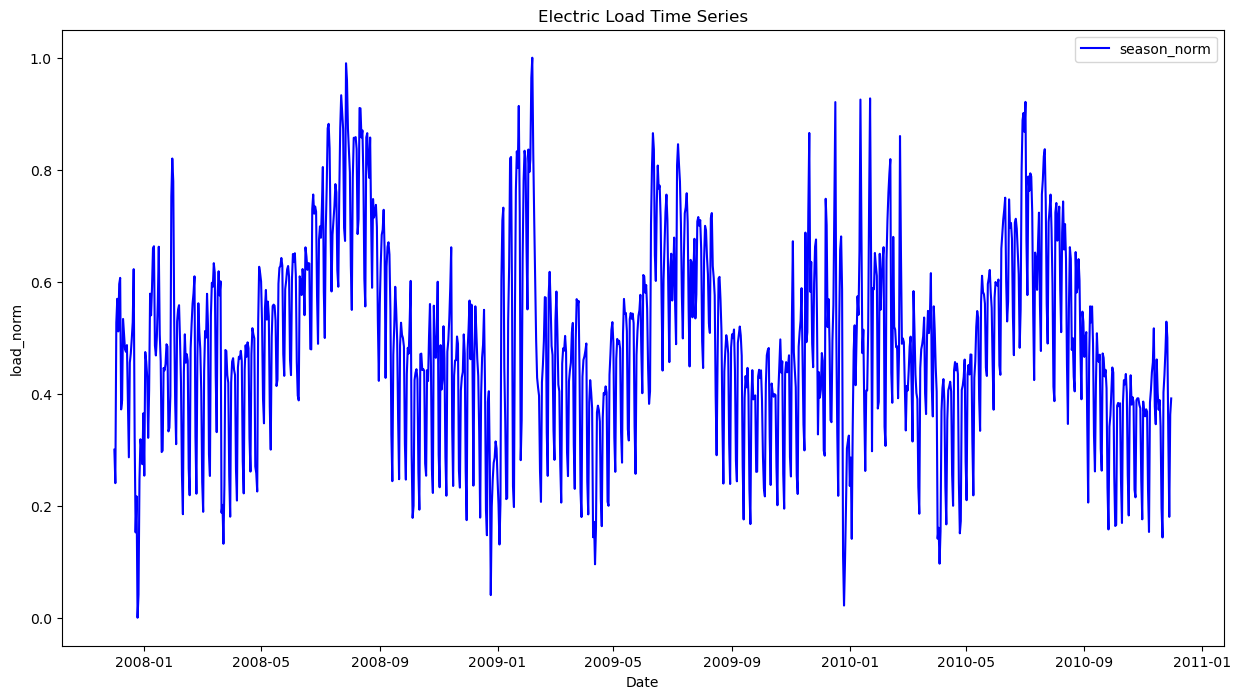

In [125]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# 读取 CSV 文件
df = pd.read_csv('data/output_avg - 3years.csv')

# 标准化处理 season 列
# scaler = StandardScaler()
scaler = MinMaxScaler()
load_norm = scaler.fit_transform(df[['avg_load']])

# 将标准化后的 season 数据添加到原始数据框中
df['load_norm'] = load_norm

# 将处理后的数据存储到新的 CSV 文件中
df.to_csv('data/STL_N-BEATS/load_norm.csv', index=False, columns=['date', 'load_norm'])

# # 因为原来electric曲线太过震荡所以就再进行平滑化
# df = pd.read_csv('data/STL_N-BEATS/seasonal_normalized.csv',index_col=0, parse_dates=True)
# # 计算指数加权移动平均
# alpha = 0.1
# ema = df['season_norm'].ewm(alpha=alpha, adjust=False).mean()
#
# # 将平滑后的结果保存到新的csv文件
# smoothed_df = pd.DataFrame({'smoothed_season': ema})
# smoothed_df.to_csv('data/STL_N-BEATS/smoothed_seasonal.csv')
import pandas as pd

# 读取原始数据
data = pd.read_csv('data/STL_N-BEATS/load_norm.csv', parse_dates=['date'], index_col='date')
fig = plt.figure(figsize=(15, 8))
# 绘制时间序列图
plt.plot(data.index, data['load_norm'], color='blue', label='season_norm')
# 添加x轴和y轴标签
plt.xlabel('Date')
plt.ylabel('load_norm')

plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

# 添加标题
plt.title('Electric Load Time Series')
# 添加图例
plt.legend()
# 显示图形
plt.show()

In [126]:
from statsmodels.tsa._stl import STL
import pandas as pd
from statsmodels.tsa.seasonal import STLDecompose

# 读取时间序列数据，假设已经存储到了 df_data 变量中
data = pd.read_csv('data/STL_N-BEATS/load_norm.csv', parse_dates=['date'], index_col='date')


# 使用 STL 分解
decomp = STL(data,period=365,seasonal=91).fit()
seasonal, trend, residual = decomp.seasonal, decomp.trend, decomp.resid



df_trend = pd.concat([trend], axis=1)
df_trend.to_csv('data/STL_N-BEATS/trend.csv')
df_seasonal = pd.concat([seasonal], axis=1)
df_seasonal.to_csv('data/STL_N-BEATS/seasonal.csv')
df_residual = pd.concat([residual], axis=1)
df_residual.to_csv('data/STL_N-BEATS/residual.csv')

              season
date                
2007-12-01 -0.278942
2007-12-02 -0.233851
2007-12-03  0.015413
2007-12-04  0.056570
2007-12-05 -0.024606
684
| N-Beats
| --  Stack Seasonality (#0) (share_weights_in_stack=True)
     | -- SeasonalityBlock(units=128, thetas_dim=30, backcast_length=210, forecast_length=30, share_thetas=True) at @2234214105352
     | -- SeasonalityBlock(units=128, thetas_dim=30, backcast_length=210, forecast_length=30, share_thetas=True) at @2234214105352
     | -- SeasonalityBlock(units=128, thetas_dim=30, backcast_length=210, forecast_length=30, share_thetas=True) at @2234214105352
| --  Stack Seasonality (#1) (share_weights_in_stack=True)
     | -- SeasonalityBlock(units=128, thetas_dim=30, backcast_length=210, forecast_length=30, share_thetas=True) at @2234272608840
     | -- SeasonalityBlock(units=128, thetas_dim=30, backcast_length=210, forecast_length=30, share_thetas=True) at @2234272608840
     | -- SeasonalityBlock(units=128, thetas_dim=30, backcast_leng

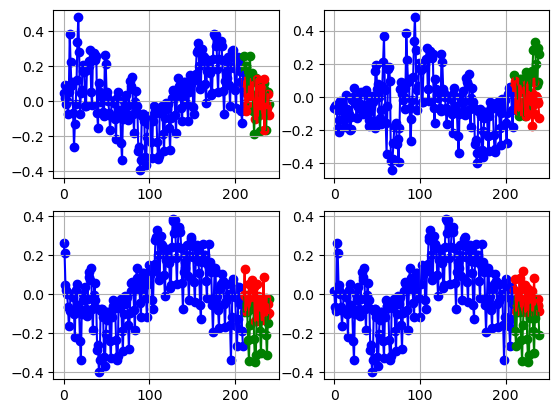

epoch = 0000, grad_step = 000022, tr_loss (epoch) = 173.986, te_loss (epoch) = 134.209


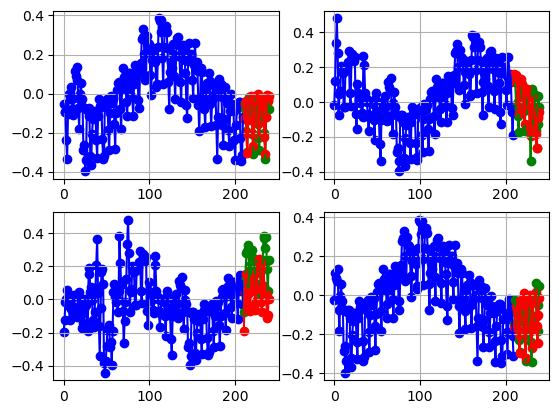

epoch = 0100, grad_step = 002222, tr_loss (epoch) = 10.496, te_loss (epoch) = 29.865


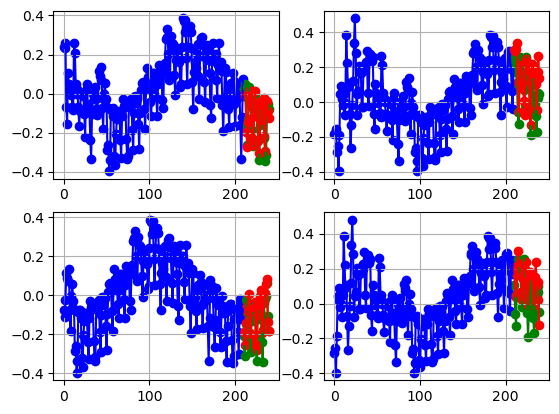

epoch = 0200, grad_step = 004422, tr_loss (epoch) = 5.124, te_loss (epoch) = 28.182


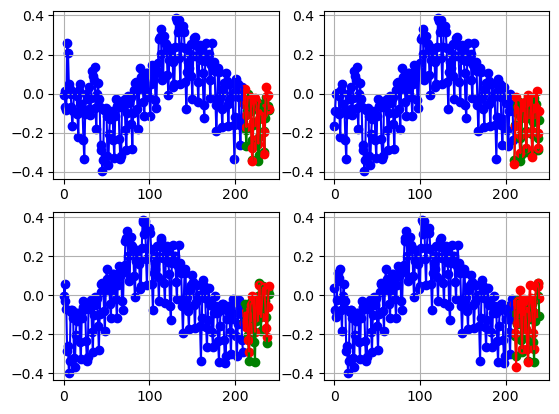

epoch = 0300, grad_step = 006622, tr_loss (epoch) = 2.895, te_loss (epoch) = 26.525


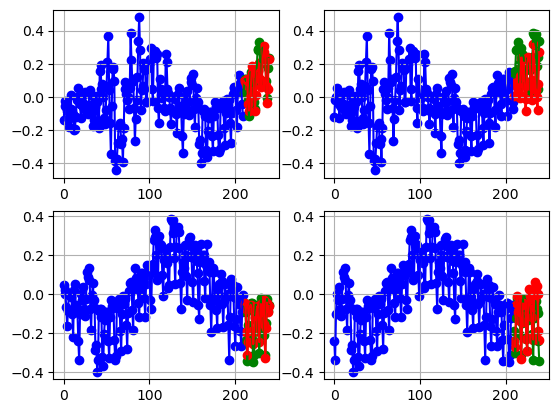

epoch = 0400, grad_step = 008822, tr_loss (epoch) = 2.255, te_loss (epoch) = 26.669


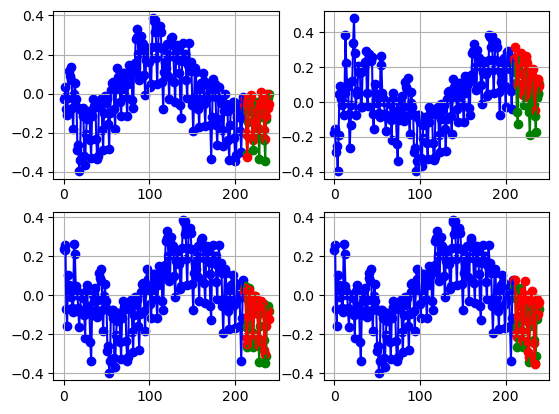

epoch = 0500, grad_step = 011022, tr_loss (epoch) = 3.099, te_loss (epoch) = 25.666


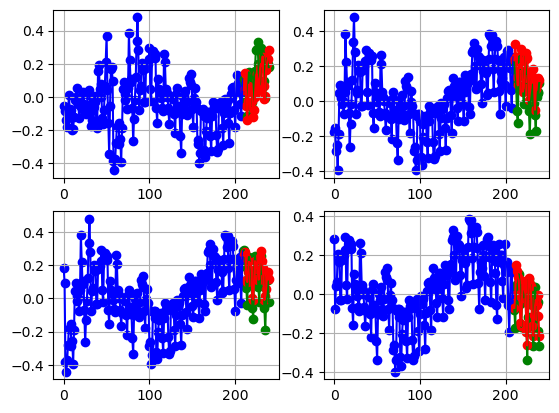

epoch = 0600, grad_step = 013222, tr_loss (epoch) = 1.989, te_loss (epoch) = 26.991


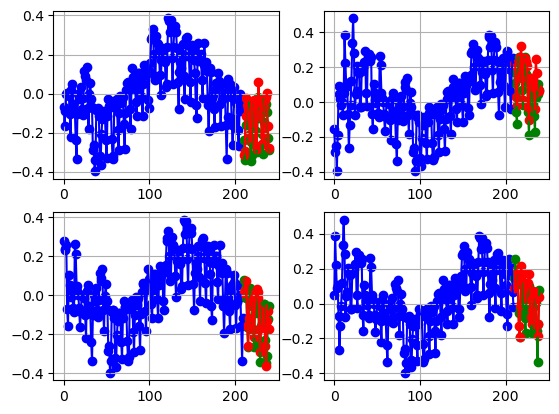

epoch = 0700, grad_step = 015422, tr_loss (epoch) = 1.201, te_loss (epoch) = 26.495


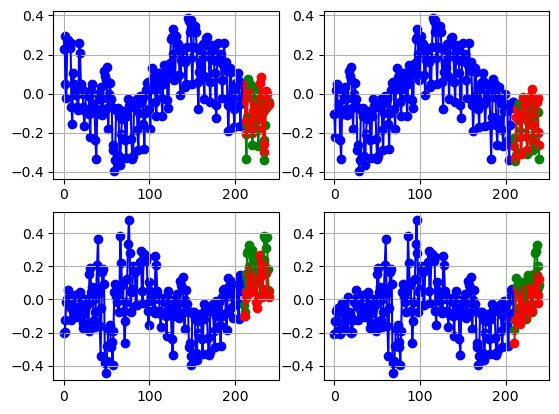

epoch = 0800, grad_step = 017622, tr_loss (epoch) = 1.017, te_loss (epoch) = 25.345


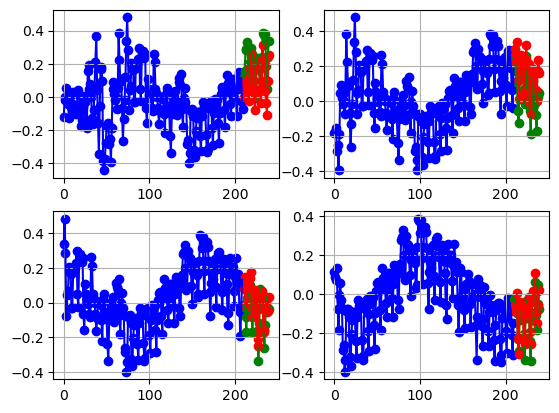

epoch = 0900, grad_step = 019822, tr_loss (epoch) = 0.967, te_loss (epoch) = 26.909
Text [-0.29099032282829285, -0.19312375783920288, -0.10392465442419052, -0.06146182864904404, -0.053434304893016815, -0.04635363444685936, -0.15309223532676697, -0.24885185062885284, -0.12467673420906067, -0.014097693376243114, -0.009242532774806023, 0.012469100765883923, 0.041753485798835754, -0.13410720229148865, -0.19761613011360168, -0.04926309362053871, 0.05117546021938324, -0.009188388474285603, -0.05570342391729355, -0.037521541118621826, -0.15321853756904602, -0.2390756905078888, -0.10614092648029327, 0.03906288370490074, 0.06708375364542007, 0.02440255507826805, 0.034043729305267334, -0.21129071712493896, -0.2005450278520584, -0.08612753450870514]
TRU [-1.20623018e-01 -3.47001373e-02 -3.50309768e-02 -7.73800095e-02
 -9.34656774e-02 -2.38362923e-01 -3.42374905e-01 -1.31357784e-01
 -1.39083982e-02 -2.15370488e-02 -3.30258498e-03  6.02435730e-02
 -1.05261171e-01 -1.84856295e-01 -5.02578461e-02  4.

In [127]:
def main():
    forecast_length = 30
    backcast_length = 7 * forecast_length
    batch_size = 32  # greater than 4 for viz

    electric = pd.read_csv('data/STL_N-BEATS/seasonal.csv', index_col=0, parse_dates=True)
    # electricO = pd.read_csv('data/STL_N-BEATS/seasonal_normalized.csv', index_col=0, parse_dates=True)

    # electricO= pd.read_csv('data/STL_N-BEATS/seasonal.csv', index_col=0, parse_dates=True)
    print(electric.head())
    # print(electricO.head())
    electric = electric.values.flatten()  # just keep np array here for simplicity.
    # electricO = electricO.values.flatten()

    # data backcast/forecast generation.
    x, y = [], []
    for epoch in range(backcast_length, len(electric) - forecast_length):

        x.append(electric[epoch - backcast_length:epoch])
        y.append(electric[epoch:epoch + forecast_length])
    x = np.array(x)
    y = np.array(y)

    # split train/test.
    c = int(len(x) * 0.8)
    print(c)

    x_train, y_train = x[:c], y[:c]
    x_test, y_test = x[c:], y[c:]

    # normalization.  归一化
    norm_constant = np.max(x_train)
    x_train, y_train = x_train / norm_constant, y_train / norm_constant
    x_test, y_test = x_test / norm_constant, y_test / norm_constant

    # model
    net = NBeatsNet(
        stack_types=( NBeatsNet.SEASONALITY_BLOCK,NBeatsNet.SEASONALITY_BLOCK),
        forecast_length=forecast_length,
        backcast_length=backcast_length,
        hidden_layer_units=128,
        share_weights_in_stack=True
    )

    optimiser = optim.Adam(lr=1e-4, params=net.parameters())

    grad_step = 0
    for epoch in range(1000):
        # train.
        net.train()
        train_loss = []
        for x_train_batch, y_train_batch in data_generator(x_train, y_train, batch_size):
            grad_step += 1
            optimiser.zero_grad()
            _, forecast = net(torch.tensor(x_train_batch, dtype=torch.float).to(net.device))
            loss = F.mse_loss(forecast, torch.tensor(y_train_batch, dtype=torch.float).to(net.device))
            train_loss.append(loss.item())
            loss.backward()
            optimiser.step()
        train_loss = np.mean(train_loss)

        # test.
        net.eval()
        _, forecast = net(torch.tensor(x_test, dtype=torch.float))
        test_loss = F.mse_loss(forecast, torch.tensor(y_test, dtype=torch.float)).item()
        p = forecast.detach().numpy()
        if epoch % 100 == 0:
            subplots = [221, 222, 223, 224]
            plt.figure(1)
            for plot_id, i in enumerate(np.random.choice(range(len(x_test)), size=4, replace=False)):
                ff, xx, yy = p[i] * norm_constant, x_test[i] * norm_constant, y_test[i] * norm_constant
                plt.subplot(subplots[plot_id])
                plt.grid()
                plot_scatter(range(0, backcast_length), xx, color='b')
                plot_scatter(range(backcast_length, backcast_length + forecast_length), yy, color='g')
                plot_scatter(range(backcast_length, backcast_length + forecast_length), ff, color='r')
            plt.show()

            with torch.no_grad():
                save(net, optimiser, grad_step)
            print(f'epoch = {str(epoch).zfill(4)}, '
                  f'grad_step = {str(grad_step).zfill(6)}, '
                  f'tr_loss (epoch) = {1000 * train_loss:.3f}, '
                  f'te_loss (epoch) = {1000 * test_loss:.3f}')

    B = forecast.flatten()
    C= B * norm_constant

    NC = C.detach().numpy()


    NNC = NC.tolist()
    # NNC = NC.reshape(-1, 1)
    # NNC = scaler.inverse_transform(NNC)
    # NNC = NNC.ravel()
    # print('type(NNC)',type(NNC))


    Text=NNC[len(NNC)-30::]
    print('Text',Text)




    # electric = electric.tolist()
    TRU = electric[len(electric)-30::]
    print('TRU',TRU)
    print('TRU',len(TRU))
    print(type(TRU),type(TRU))



    # MAPE

    APE=[]
    for day in range(len(TRU)):
        per_err = (TRU[day] - Text[day]) / TRU[day]
        per_err = abs(per_err)
        APE.append(per_err)
        MAPE = sum(APE)/len(APE)
    print(len(TRU),'天总共预测电量的mape的平均值')
    print('mape :',round(MAPE, 2))
    print('mape % :',round(MAPE*100, 2),'%')
    print('---------------------------------------------')
    EVE=[]
    for day in range(len(TRU)):
        per_err1 = abs((TRU[day] - Text[day]) / TRU[day])
        EVE.append(per_err1*100)
    print(EVE)

    torch.save(net,'STL_N-BEATS(seasonal).pth')


if __name__ == '__main__':
    main()

将时间序列进行STL分解（1000） 分装在三个csv中

In [13]:
from statsmodels.tsa._stl import STL
import pandas as pd
from statsmodels.tsa.seasonal import STLDecompose

# 读取时间序列数据，假设已经存储到了 df_data 变量中
data = pd.read_csv('data/8888.csv', parse_dates=['date'], index_col='date')


# 使用 STL 分解
decomp = STL(data,period=365,trend=399,seasonal=91).fit()
seasonal, trend, residual = decomp.seasonal, decomp.trend, decomp.resid



df_trend = pd.concat([trend], axis=1)
df_trend.to_csv('data/STL_N-BEATS/trend.csv')
df_seasonal = pd.concat([seasonal], axis=1)
df_seasonal.to_csv('data/STL_N-BEATS/seasonal.csv')
df_residual = pd.concat([residual], axis=1)
df_residual.to_csv('data/STL_N-BEATS/residual.csv')


将时间序列进行STL分解（365） 分装在三个csv中


In [1]:
from statsmodels.tsa._stl import STL
import pandas as pd
from statsmodels.tsa.seasonal import STLDecompose

# 读取时间序列数据，假设已经存储到了 df_data 变量中
data = pd.read_csv('data/output_avg - 3years.csv', parse_dates=['date'], index_col='date')


# 使用 STL 分解
decomp = STL(data,period=365,seasonal=91,trend=399).fit()
seasonal, trend, residual = decomp.seasonal, decomp.trend, decomp.resid



df_trend = pd.concat([trend], axis=1)
df_trend.to_csv('data/STL_N-BEATS/trend.csv')
df_seasonal = pd.concat([seasonal], axis=1)
df_seasonal.to_csv('data/STL_N-BEATS/seasonal.csv')

# data = pd.read_csv('data/STL_N-BEATS/seasonal.csv', parse_dates=['date'], index_col='date')
# # 将 load 列中的值加上 2000
# data['season'] = data['season']
# # 将修改后的数据保存回原始 CSV 文件中
# data.to_csv('data/STL_N-BEATS/seasonal.csv')

df_residual = pd.concat([residual], axis=1)
df_residual.to_csv('data/STL_N-BEATS/residual.csv')


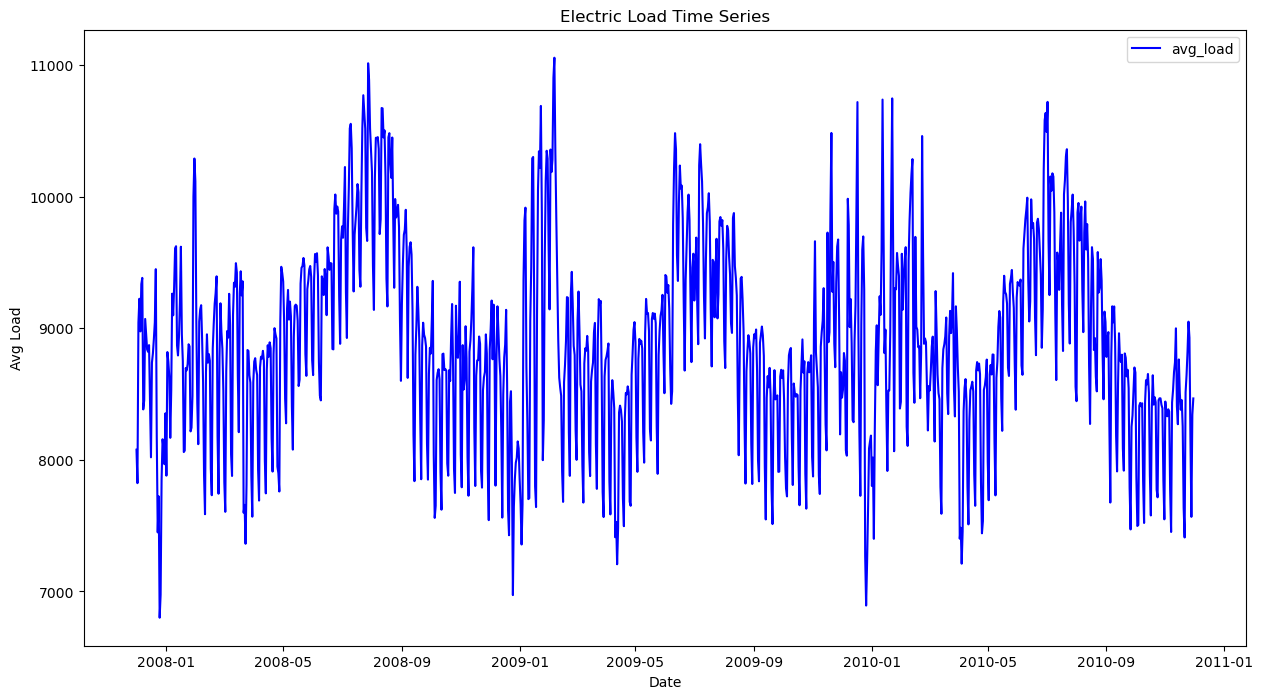

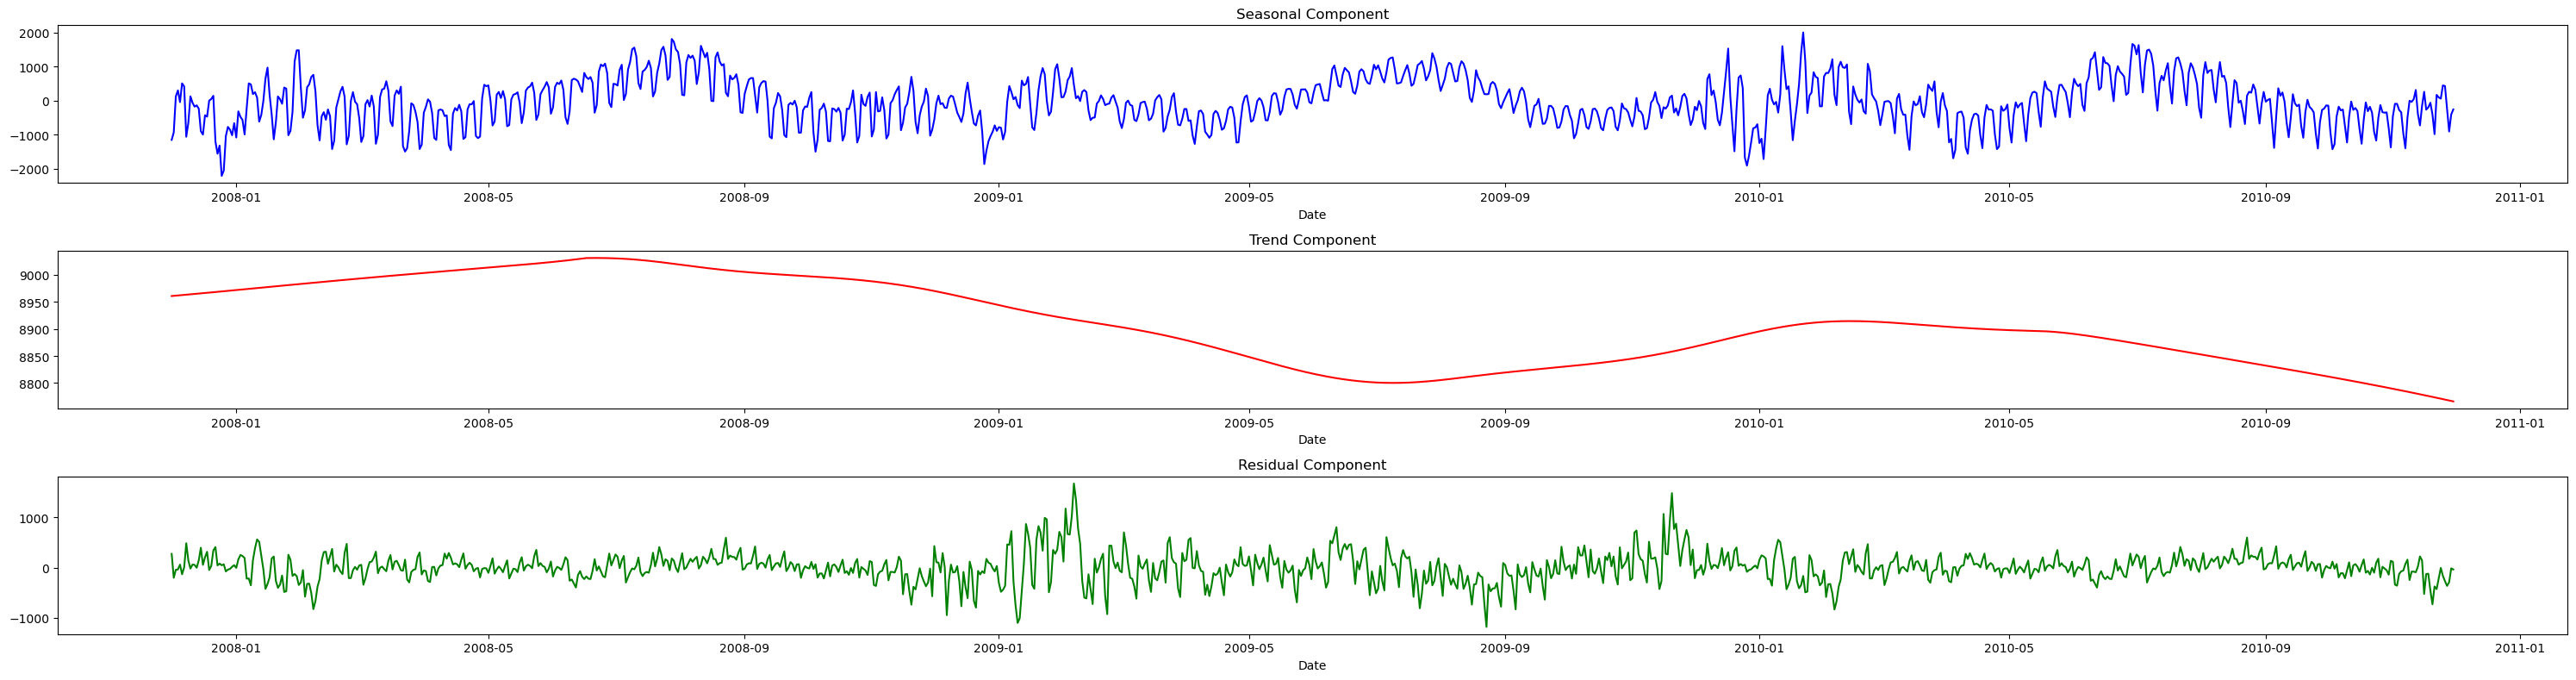

In [3]:
# STL分解只保留季节
import pandas as pd

# 读取原始数据
data = pd.read_csv('data/output_avg - 3years.csv', parse_dates=['date'], index_col='date')
fig = plt.figure(figsize=(15, 8))
# 绘制时间序列图
plt.plot(data.index, data['avg_load'], color='blue', label='avg_load')
# 添加x轴和y轴标签
plt.xlabel('Date')
plt.ylabel('Avg Load')

plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

# 添加标题
plt.title('Electric Load Time Series')
# 添加图例
plt.legend()
# 显示图形
plt.show()



# 使用 STL 方法进行分解
from statsmodels.tsa.seasonal import STL
decomp = STL(data,period=365,seasonal=91,trend=399).fit()
seasonal, trend, residual = decomp.seasonal, decomp.trend, decomp.resid

# 平滑化 seasonal 和 trend
# seasonal_smoothed = seasonal.rolling(window=7, center=True).mean()
# trend_smoothed = trend.rolling(window=7, center=True).mean()
# residual  = residual.ewm(alpha=0.2, adjust=False).mean()


# 将 seasonal_smoothed、trend_smoothed 和 residual 合并为一个 DataFrame
df = pd.concat([seasonal, trend, residual], axis=1)
df.columns = ['seasonal', 'trend', 'residual']

# 对每一行进行求和
# df['all_load'] = df.sum(axis=1)
# 全
df.to_csv('data/residual/new_data（all）.csv')


import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件，将日期作为索引
data = pd.read_csv('data/residual/new_data（all）.csv', index_col='date', parse_dates=True)

# 创建子图
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(30, 8))

# 绘制季节分量
axes[0].plot(data['seasonal'], color='blue')
axes[0].set_title('Seasonal Component')

# 绘制趋势分量
axes[1].plot(data['trend'], color='red')
axes[1].set_title('Trend Component')

# 绘制残差分量
axes[2].plot(data['residual'], color='green')
axes[2].set_title('Residual Component')

# 设置横轴标签
for ax in axes:
    ax.set_xlabel('Date')

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()

# 单季节
# df = df.drop(['trend', 'seasonal'], axis=1)
# df.to_csv('data/residual/new_data（residual）.csv')

# 将 DataFrame 写入 CSV 文件
# df.to_csv('processed_data1.csv')
# df = pd.DataFrame({'date': data['date'], 'all_load': all_load})
# df.to_csv('new_data1.csv')


拟合trend曲线 并根据拟合出来的曲线预测之后一个月（31天）的数据

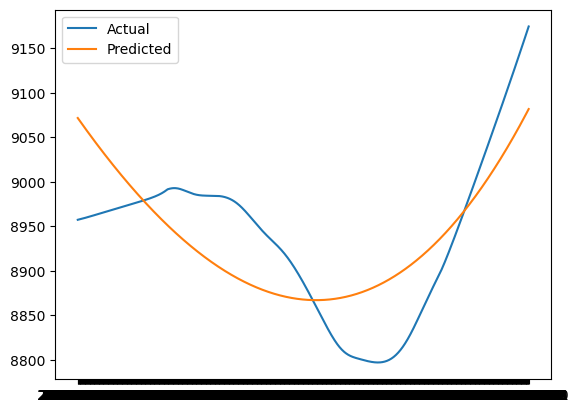

MAPE: 0.6070772371700072


In [100]:

import pandas as pd
from datetime import datetime
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt


# 读取数据
df = pd.read_csv('data/STL_N-BEATS/trend.csv')

# 将日期转换为时间戳
df['timestamp'] = pd.to_datetime(df['date']).apply(datetime.timestamp)
# df['timestamp'] = df['date'].apply(datetime.timestamp)

# 归一化处理
trend_min = df['trend'].min()
trend_max = df['trend'].max()
df['trend_norm'] = (df['trend'] - trend_min) / (trend_max - trend_min)
# sc_trend = MinMaxScaler()
# df['trend_norm'] = sc_trend.fit_transform(df['trend'])

# 使用多项式回归拟合
x = np.array(df['timestamp']).reshape(-1, 1)
y = np.array(df['trend_norm']).reshape(-1, 1)
poly = PolynomialFeatures(degree=8)
x_poly = poly.fit_transform(x)
poly.fit(x_poly, y)
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)

# Predict trend values using the model
y_pred = lin_reg.predict(x_poly)
y_pred1 = y_pred * (trend_max - trend_min) + trend_min

# Calculate the mean absolute percentage error
mape = mean_absolute_percentage_error(df['trend'], y_pred1)

# Plot the data and the model predictions
plt.plot(df['date'], df['trend'], label='Actual')
plt.plot(df['date'], y_pred1, label='Predicted')
plt.legend()
plt.show()

print('MAPE:', mape*100)


# 生成未来30天的日期序列
last_date = datetime.strptime(df['date'].iloc[-1], '%Y-%m-%d')
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')

# 对未来30天的日期进行预测
future_trend_norm = []
for date in future_dates:
    timestamp = datetime.timestamp(date)
    x_test = poly.fit_transform([[timestamp]])
    y_pred_norm = lin_reg.predict(x_test)[0]
    future_trend_norm.append(y_pred_norm)

# 反归一化处理，将预测结果转换为原始数据的范围
future_trend = []
for norm_value in future_trend_norm:
    trend_value = norm_value * (trend_max - trend_min) + trend_min
    future_trend.append(trend_value)

# 将预测结果存入csv文件
future_df = pd.DataFrame({'date': future_dates, 'trend': future_trend})
future_df.to_csv('data/STL_N-BEATS/future_trend(fake).csv', index=False)
df = pd.read_csv('data/STL_N-BEATS/future_trend(fake).csv')
df['trend'] = df['trend'].astype(str).str.slice(1, -1)
df['trend'] = df['trend'].astype(float)
df.to_csv('data/STL_N-BEATS/future_trend.csv', index=False)

In [6]:
# plot utils.
def plot_scatter(*args, **kwargs):
    plt.plot(*args, **kwargs)
    plt.scatter(*args, **kwargs)


# simple batcher.
def data_generator(x, y, size):
    assert len(x) == len(y)
    batches = []
    for ii in range(0, len(x), size):
        batches.append((x[ii:ii + size], y[ii:ii + size]))
    for batch in batches:
        yield batch

class CustomLoss(torch.nn.Module):
    def __init__(self):
        super(CustomLoss,self).__init__()

    def forward(self,x,y):
        my_loss = torch.mean(torch.abs((x - y)/y))
        return  my_loss

处理seasonal.csv 运用了标准化和平滑化进行预处理 但是学习效果依旧不好  其他解决方法 1、减少数据集个数 2、试试归一化

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# 读取 CSV 文件
df = pd.read_csv('data/STL_N-BEATS/seasonal.csv')

# 标准化处理 season 列
scaler = StandardScaler()
# scaler = MinMaxScaler()
season_norm = scaler.fit_transform(df[['season']])

# 将标准化后的 season 数据添加到原始数据框中
df['season_norm'] = season_norm

# 将处理后的数据存储到新的 CSV 文件中
df.to_csv('data/STL_N-BEATS/seasonal_normalized.csv', index=False, columns=['date', 'season_norm'])

# # 因为原来electric曲线太过震荡所以就再进行平滑化
# df = pd.read_csv('data/STL_N-BEATS/seasonal_normalized.csv',index_col=0, parse_dates=True)
# # 计算指数加权移动平均
# alpha = 0.1
# ema = df['season_norm'].ewm(alpha=alpha, adjust=False).mean()
#
# # 将平滑后的结果保存到新的csv文件
# smoothed_df = pd.DataFrame({'smoothed_season': ema})
# smoothed_df.to_csv('data/STL_N-BEATS/smoothed_seasonal.csv')
# import pandas as pd
#
# # 读取原始数据
# data = pd.read_csv('data/STL_N-BEATS/smoothed_seasonal.csv', parse_dates=['date'], index_col='date')
# fig = plt.figure(figsize=(15, 8))
# # 绘制时间序列图
# plt.plot(data.index, data['smoothed_season'], color='blue', label='season_norm')
# # 添加x轴和y轴标签
# plt.xlabel('Date')
# plt.ylabel('Avg Load')
#
# plt.tick_params(axis='x', labelsize=10)
# plt.tick_params(axis='y', labelsize=10)
#
# # 添加标题
# plt.title('Electric Load Time Series')
# # 添加图例
# plt.legend()
# # 显示图形
# plt.show()

第一步尝试尝试减少数据集


In [54]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 读取 CSV 文件
df = pd.read_csv('data/STL_N-BEATS/seasonal.csv')

# 标准化处理 season 列
scaler = StandardScaler()
season_norm = scaler.fit_transform(df[['season']])

# 将标准化后的 season 数据添加到原始数据框中
df['season_norm'] = season_norm

# 将处理后的数据存储到新的 CSV 文件中
df.to_csv('data/STL_N-BEATS/seasonal_normalized.csv', index=False, columns=['date', 'season_norm'])

# 因为原来electric曲线太过震荡所以就再进行平滑化
df = pd.read_csv('data/STL_N-BEATS/seasonal_normalized.csv',index_col=0, parse_dates=True)
# 计算指数加权移动平均
alpha = 0.4
ema = df['season_norm'].ewm(alpha=alpha, adjust=False).mean()

# 将平滑后的结果保存到新的csv文件
smoothed_df = pd.DataFrame({'smoothed_season': ema})
smoothed_df.to_csv('data/STL_N-BEATS/smoothed_seasonal.csv')


            season_norm
date                   
2007-12-01    -1.657935
2007-12-02    -1.333599
2007-12-03     0.221067
2007-12-04     0.477502
2007-12-05    -0.029204
736
| N-Beats
| --  Stack Trend (#0) (share_weights_in_stack=True)
     | -- TrendBlock(units=128, thetas_dim=4, backcast_length=168, forecast_length=7, share_thetas=True) at @2481417205704
     | -- TrendBlock(units=128, thetas_dim=4, backcast_length=168, forecast_length=7, share_thetas=True) at @2481417205704
     | -- TrendBlock(units=128, thetas_dim=4, backcast_length=168, forecast_length=7, share_thetas=True) at @2481417205704
| --  Stack Seasonality (#1) (share_weights_in_stack=True)
     | -- SeasonalityBlock(units=128, thetas_dim=7, backcast_length=168, forecast_length=7, share_thetas=True) at @2481712419336
     | -- SeasonalityBlock(units=128, thetas_dim=7, backcast_length=168, forecast_length=7, share_thetas=True) at @2481712419336
     | -- SeasonalityBlock(units=128, thetas_dim=7, backcast_length=168, foreca

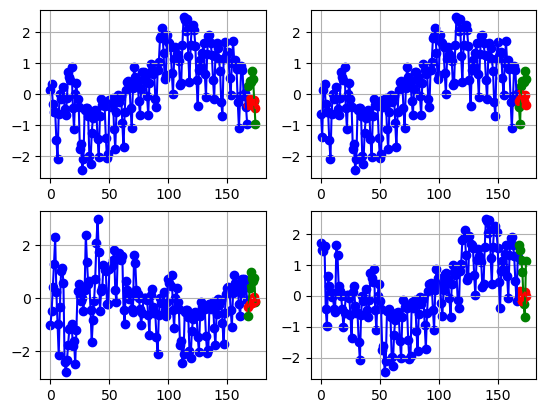

epoch = 0000, grad_step = 000015, tr_loss (epoch) = 12445.645, te_loss (epoch) = 4551.512


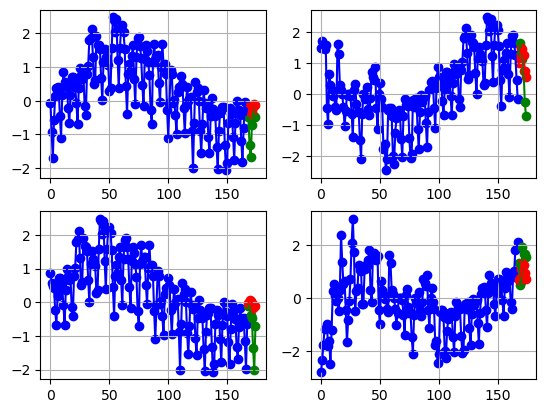

epoch = 0100, grad_step = 001515, tr_loss (epoch) = 1637.618, te_loss (epoch) = 2162.716


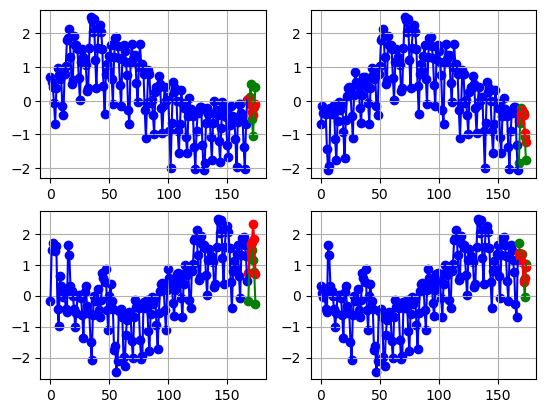

epoch = 0200, grad_step = 003015, tr_loss (epoch) = 547.736, te_loss (epoch) = 2208.536


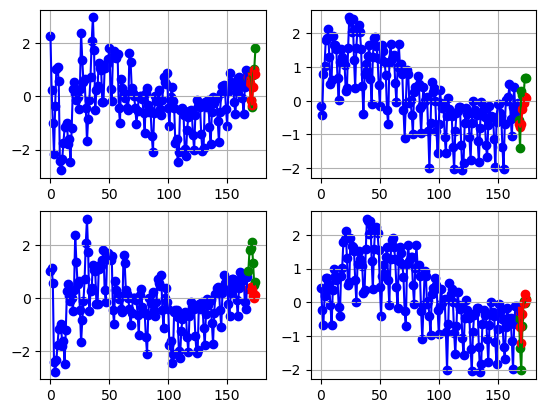

epoch = 0300, grad_step = 004515, tr_loss (epoch) = 458.819, te_loss (epoch) = 2526.763


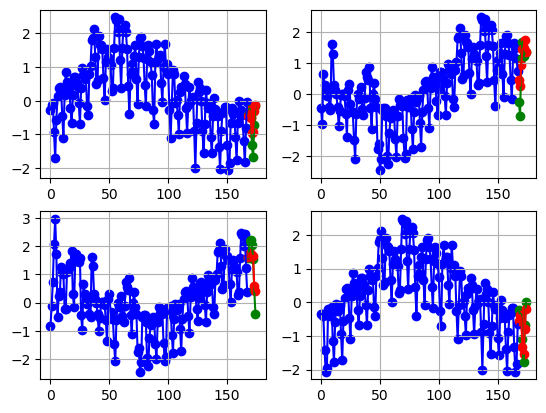

epoch = 0400, grad_step = 006015, tr_loss (epoch) = 420.812, te_loss (epoch) = 2026.678


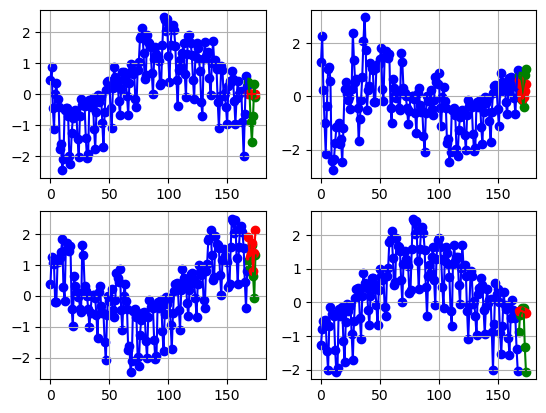

epoch = 0500, grad_step = 007515, tr_loss (epoch) = 811.238, te_loss (epoch) = 2035.249


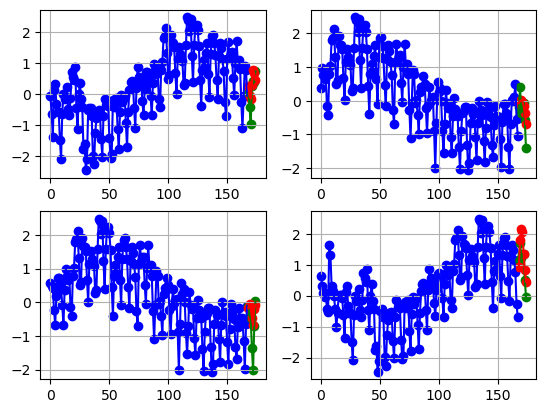

epoch = 0600, grad_step = 009015, tr_loss (epoch) = 532.492, te_loss (epoch) = 2193.058


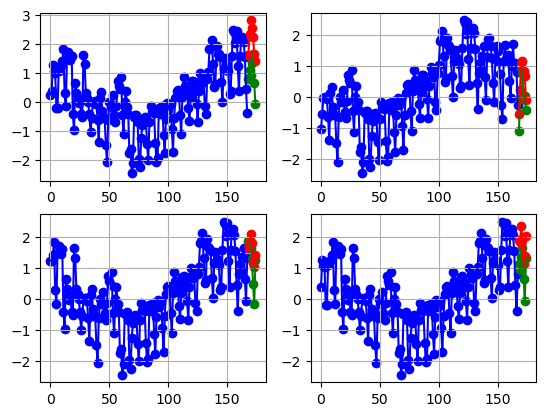

epoch = 0700, grad_step = 010515, tr_loss (epoch) = 430.109, te_loss (epoch) = 2398.471


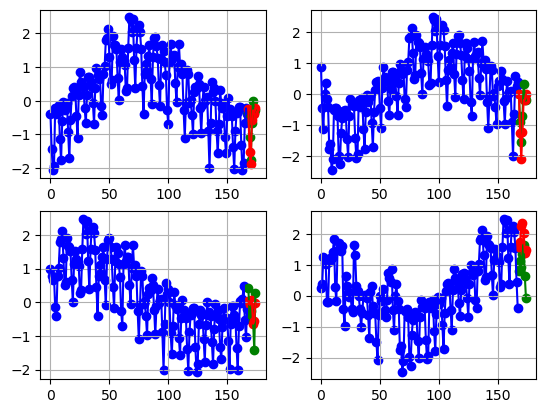

epoch = 0800, grad_step = 012015, tr_loss (epoch) = 389.598, te_loss (epoch) = 2451.981


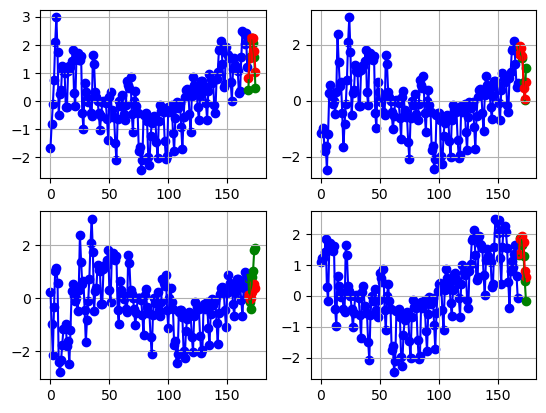

epoch = 0900, grad_step = 013515, tr_loss (epoch) = 359.850, te_loss (epoch) = 2338.648
TRU [ 1.73497712e-01  7.09975148e-01  7.16259952e-01  5.51410388e-01
  4.04849239e-01 -7.45886363e-02 -6.78659571e-01  3.64350011e-01
  9.77090369e-01  7.67460340e-01  6.56149264e-01  7.55811045e-01
 -1.43968854e-01 -4.09353021e-01  7.90220685e-01  1.03332902e+00
  1.80368001e+00  1.87395255e+00  2.12301050e+00  1.31283309e+00
  5.00625646e-01  6.12844143e-01  1.91489612e+00  1.66441393e+00
  1.64296651e+00  1.53166817e+00  6.75795187e-01  9.76102017e-03
  1.14672608e+00  1.52141034e+00  1.28904010e+00  1.19098045e+00
  1.07279093e+00  2.83798450e-01  3.66690120e-01  1.57298360e+00
  2.47719237e+00  2.40340204e+00  2.02926693e+00  2.42993833e+00
  1.21805899e+00  3.89408767e-01  1.57799539e+00  2.19618851e+00
  2.23615295e+00  2.05390604e+00  1.54943314e+00  4.48849589e-01
 -3.96641491e-01  7.83990561e-01  1.10502113e+00  9.11717107e-01
  1.33653897e+00  1.65069211e+00  6.48282151e-01 -8.98304136e-0

In [21]:
def main():
    forecast_length = 7
    backcast_length = 24 * forecast_length
    batch_size = 50  # greater than 4 for viz

    # electric = pd.read_csv('data/STL_N-BEATS/smoothed_seasonal.csv', index_col=0, parse_dates=True)
    electric = pd.read_csv('data/STL_N-BEATS/seasonal_normalized.csv', index_col=0, parse_dates=True)

    # electricO = pd.read_csv('data/STL_N-BEATS/seasonal_normalized.csv', index_col=0, parse_dates=True)

    # electricO= pd.read_csv('data/STL_N-BEATS/seasonal.csv', index_col=0, parse_dates=True)
    print(electric.head())
    # print(electricO.head())
    electric = electric.values.flatten()  # just keep np array here for simplicity.
    # electricO = electricO.values.flatten()

    # data backcast/forecast generation.
    x, y = [], []
    for epoch in range(backcast_length, len(electric) - forecast_length):

        x.append(electric[epoch - backcast_length:epoch])
        y.append(electric[epoch:epoch + forecast_length])
    x = np.array(x)
    y = np.array(y)

    # split train/test.
    c = int(len(x) * 0.8)
    print(c)

    x_train, y_train = x[:c], y[:c]
    x_test, y_test = x[c:], y[c:]

    # normalization.  归一化
    norm_constant = np.max(x_train)
    x_train, y_train = x_train / norm_constant, y_train / norm_constant
    x_test, y_test = x_test / norm_constant, y_test / norm_constant

    # model
    net = NBeatsNet(
        stack_types=( NBeatsNet.TREND_BLOCK,NBeatsNet.SEASONALITY_BLOCK),
        forecast_length=forecast_length,
        backcast_length=backcast_length,
        hidden_layer_units=128,
        share_weights_in_stack=True
    )

    optimiser = optim.Adam(lr=1e-3, params=net.parameters())

    grad_step = 0
    for epoch in range(1000):
        # train.
        net.train()
        train_loss = []
        for x_train_batch, y_train_batch in data_generator(x_train, y_train, batch_size):
            grad_step += 1
            optimiser.zero_grad()
            _, forecast = net(torch.tensor(x_train_batch, dtype=torch.float).to(net.device))
            criterion_neg_train = CustomLoss()
            loss = criterion_neg_train(forecast, torch.tensor(y_train_batch, dtype=torch.float).to(net.device))
            # loss = F.mse_loss(forecast, torch.tensor(y_train_batch, dtype=torch.float).to(net.device))
            train_loss.append(loss.item())
            loss.backward()
            optimiser.step()
        train_loss = np.mean(train_loss)

        # test.
        net.eval()
        _, forecast = net(torch.tensor(x_test, dtype=torch.float))
        criterion_neg_test = CustomLoss()
        test_loss = criterion_neg_test(forecast, torch.tensor(y_test, dtype=torch.float)).item()
        # test_loss = F.mse_loss(forecast, torch.tensor(y_test, dtype=torch.float)).item()
        p = forecast.detach().numpy()
        if epoch % 100 == 0:
            subplots = [221, 222, 223, 224]
            plt.figure(1)
            for plot_id, i in enumerate(np.random.choice(range(len(x_test)), size=4, replace=False)):
                ff, xx, yy = p[i] * norm_constant, x_test[i] * norm_constant, y_test[i] * norm_constant
                plt.subplot(subplots[plot_id])
                plt.grid()
                plot_scatter(range(0, backcast_length), xx, color='b')
                plot_scatter(range(backcast_length, backcast_length + forecast_length), yy, color='g')
                plot_scatter(range(backcast_length, backcast_length + forecast_length), ff, color='r')
            plt.show()

            with torch.no_grad():
                save(net, optimiser, grad_step)
            print(f'epoch = {str(epoch).zfill(4)}, '
                  f'grad_step = {str(grad_step).zfill(6)}, '
                  f'tr_loss (epoch) = {1000 * train_loss:.3f}, '
                  f'te_loss (epoch) = {1000 * test_loss:.3f}')

    B = forecast.flatten()
    C= B * norm_constant

    NC = C.detach().numpy()


    NNC = NC.tolist()
    # NNC = NC.reshape(-1, 1)
    # NNC = scaler.inverse_transform(NNC)
    # NNC = NNC.ravel()
    # print('type(NNC)',type(NNC))


    # Text=NNC[len(NNC)-30::]
    # print('Text',Text)




    # electric = electric.tolist()
    # TRU = electric[len(electric)-30::]
    # print('TRU',TRU)
    # print('TRU',len(TRU))
    # print(type(TRU),type(TRU))

    TRU = electric[len(electric)-len(forecast)-forecast_length+1::]
    print('TRU',TRU)
    print('TRU',len(TRU))
    print(type(TRU))


    avg=[]
    # 当len（forecast）< forecast_length
    if  forecast_length>len(forecast):
       for i in range(0,len(forecast)+forecast_length-1):
          if i == 0:
             avg.append(NNC[i])
             pass

          elif 0<i<=len(forecast)-1:
             N = np.mean(NNC[i:forecast_length * i + 1:6])
             avg.append(N)
             pass

          elif forecast_length-1>=i>len(forecast)-1:
             avg.append(np.mean(NNC[i:forecast_length * i + 1:6]))
             pass

          elif len(forecast) + forecast_length - 2 > i > forecast_length-1:
             j = i - forecast_length + 1
             avg.append(np.mean(NNC[i + 6 * j:len(NNC):6]))
             pass

          else:
             c = i - forecast_length+1
             avg.append(NNC[ i + c * 6 ])
             pass
       pass

    # 当len（forecast）= forecast_length
    elif forecast_length == len(forecast):
        for i in range(0,len(forecast)+forecast_length-1):
          if i == 0:
             avg.append(NNC[i])
             pass

          elif 0<i<=len(forecast)-1:
             N = np.mean(NNC[i :4 * i + 1 : 6])
             avg.append(N)
             pass

          elif len(forecast) + forecast_length - 2 > i > forecast_length-1:
             j = i - forecast_length + 1
             avg.append(np.mean(NNC[i + 6 * j:len(NNC):6]))
             pass

          else:
             c = i - forecast_length+1
             avg.append(NNC[ i + c * 6 ])
             pass
        pass

    # 当len（forecast）> forecast_length
    else:
        for i in range(0,len(forecast)+forecast_length-1):
          if i == 0:
             avg.append(NNC[i])
             pass

          elif 0<i<=forecast_length-1:
             N = np.mean(NNC[i:forecast_length * i + 1:6])
             avg.append(N)
             pass

          elif len(forecast)-1>i>forecast_length-1:
             t = i - forecast_length
             avg.append(np.mean(NNC[i + 6 * t : len(NNC) - (len(forecast)-i) * forecast_length - 1 : 6]))
             pass

          # 在这里下端触底了
          elif len(forecast) + forecast_length - 2 > i >= len(forecast)-1:
             j = i - forecast_length + 1
             avg.append(np.mean(NNC[i + 6 * j:len(NNC) - 1 : 6]))
             pass

          else:
             c = i - forecast_length+1
             avg.append(NNC[ i + c * 6 ])
             pass
        pass

    print('avg',avg)
    print(type(avg))





    # MAPE

    APE=[]
    for day in range(len(forecast)+forecast_length-1):
        per_err = (TRU[day] - avg[day]) / TRU[day]
        per_err = abs(per_err)
        APE.append(per_err)
        MAPE = sum(APE)/len(APE)
    print(len(TRU),'天总共预测电量的mape的平均值')
    print('mape :',round(MAPE, 2))
    print('mape % :',round(MAPE*100, 2),'%')
    print('---------------------------------------------')
    EVE=[]
    for day in range(len(TRU)):
        per_err1 = abs((TRU[day] - avg[day]) / TRU[day])
        EVE.append(per_err1*100)
    print(EVE)

    torch.save(net,'STL_N-BEATS(seasonal).pth')


if __name__ == '__main__':
    main()

            smoothed_season
date                       
2007-12-06         0.735687
2007-12-07         0.642796
2007-12-08        -0.877871
2007-12-09        -0.919977
2007-12-10        -0.145305
608
| N-Beats
| --  Stack Trend (#0) (share_weights_in_stack=True)
     | -- TrendBlock(units=128, thetas_dim=4, backcast_length=210, forecast_length=30, share_thetas=True) at @2234166291016
     | -- TrendBlock(units=128, thetas_dim=4, backcast_length=210, forecast_length=30, share_thetas=True) at @2234166291016
     | -- TrendBlock(units=128, thetas_dim=4, backcast_length=210, forecast_length=30, share_thetas=True) at @2234166291016
| --  Stack Seasonality (#1) (share_weights_in_stack=True)
     | -- SeasonalityBlock(units=128, thetas_dim=30, backcast_length=210, forecast_length=30, share_thetas=True) at @2234195420104
     | -- SeasonalityBlock(units=128, thetas_dim=30, backcast_length=210, forecast_length=30, share_thetas=True) at @2234195420104
     | -- SeasonalityBlock(units=128, thetas

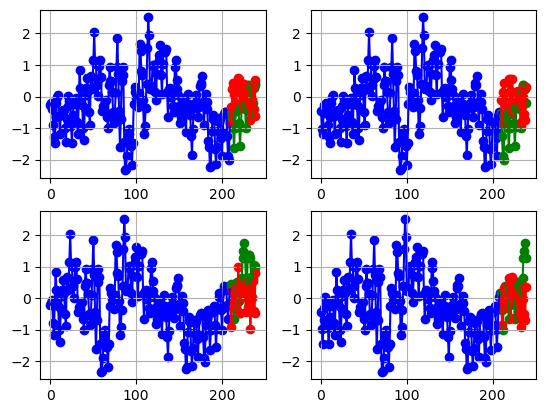

epoch = 0000, grad_step = 000013, tr_loss (epoch) = 165.300, te_loss (epoch) = 162.498


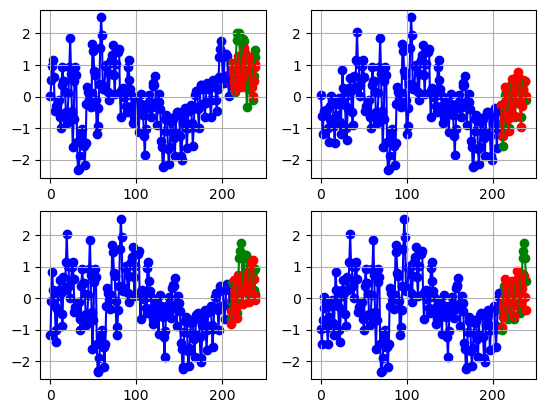

epoch = 0100, grad_step = 001313, tr_loss (epoch) = 13.024, te_loss (epoch) = 47.959


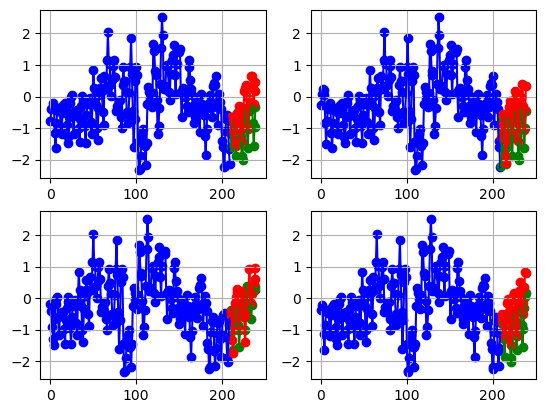

epoch = 0200, grad_step = 002613, tr_loss (epoch) = 6.229, te_loss (epoch) = 48.839


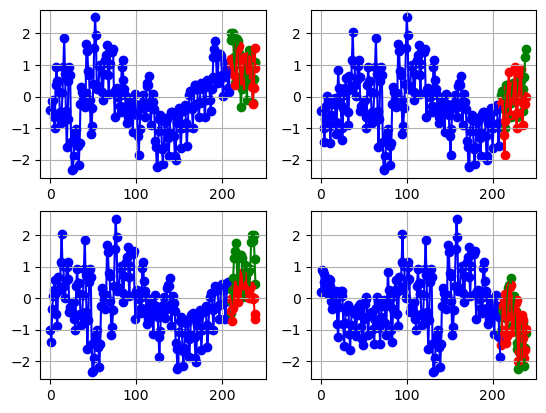

epoch = 0300, grad_step = 003913, tr_loss (epoch) = 3.781, te_loss (epoch) = 49.910


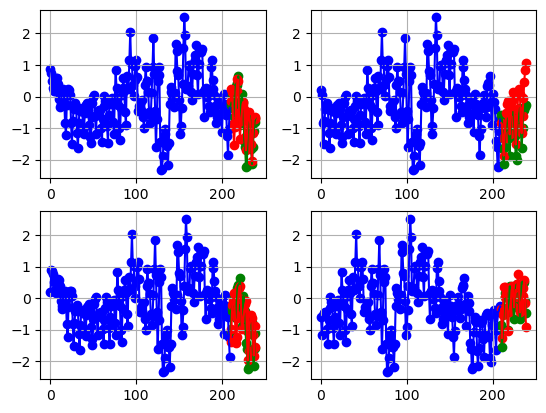

epoch = 0400, grad_step = 005213, tr_loss (epoch) = 3.793, te_loss (epoch) = 50.259


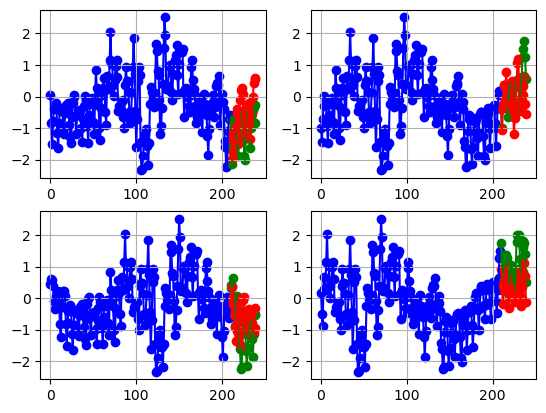

epoch = 0500, grad_step = 006513, tr_loss (epoch) = 2.900, te_loss (epoch) = 51.275


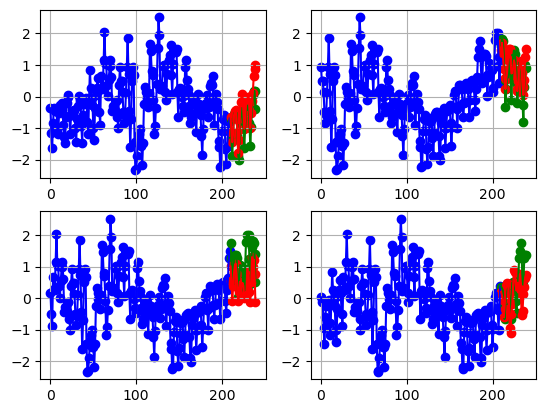

epoch = 0600, grad_step = 007813, tr_loss (epoch) = 2.868, te_loss (epoch) = 49.681


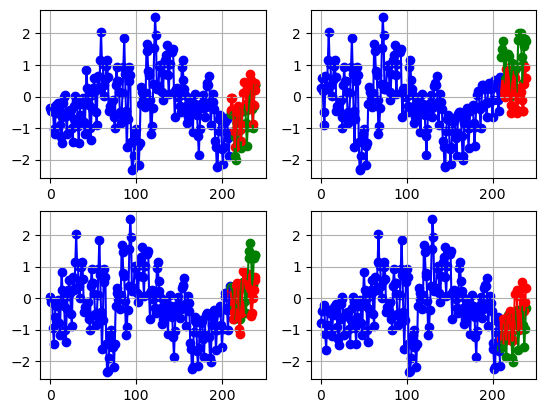

epoch = 0700, grad_step = 009113, tr_loss (epoch) = 2.129, te_loss (epoch) = 50.449


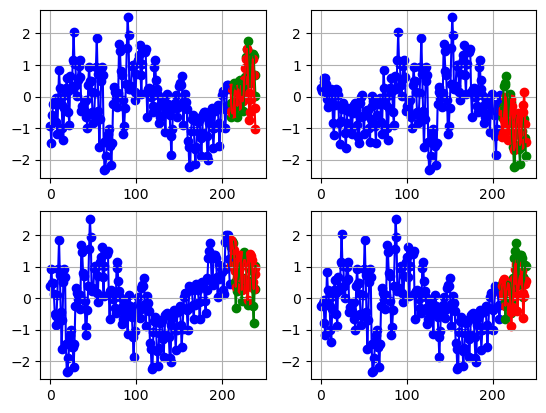

epoch = 0800, grad_step = 010413, tr_loss (epoch) = 1.906, te_loss (epoch) = 48.730


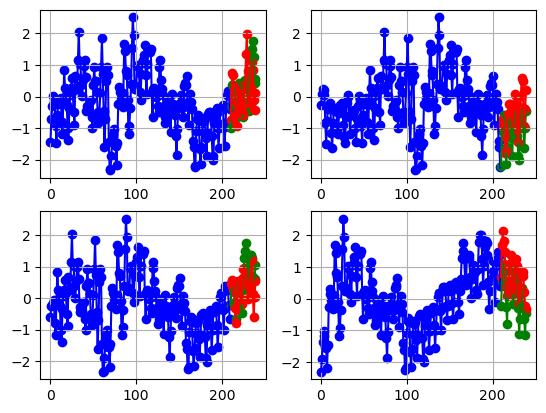

epoch = 0900, grad_step = 011713, tr_loss (epoch) = 2.403, te_loss (epoch) = 49.327
type(NNC) <class 'numpy.ndarray'>
Text [  57.469887  466.8412    726.9653    684.69574   808.73505   681.43
  380.4884    195.57683   350.46442   615.01385   726.9351    872.5061
  683.8271    114.99833  -230.9187    -36.237072  158.19928   285.36346
  490.8741    401.141     123.561806  -35.416363  228.78862   347.2928
  351.40213   322.4316    146.78328  -256.0115   -565.62646  -315.92245 ]
TRU [  530.24794045   919.18578381   598.26843684   669.61873757
   682.11996054   108.53793427  -269.58151056   445.13528153
   911.00723435   477.6973753    503.74553534   291.6153603
  -432.98995003 -1006.44404842  -301.64494018   367.92309929
   281.58882454  -296.97094509  -240.34380263  -547.0092207
  -928.69556587   -96.45596803    17.49222386   -12.11648684
   229.17588926    69.61643344  -428.38345617  -924.88041226
  -353.44157775     1.92658237]
TRU 30
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
30 天

In [15]:
def main():
    forecast_length = 30
    backcast_length = 7 * forecast_length
    batch_size = 50  # greater than 4 for viz

    electric = pd.read_csv('data/STL_N-BEATS/9 (1000)/smoothed_seasonal.csv', index_col=0, parse_dates=True)
    electricO= pd.read_csv('data/STL_N-BEATS/9 (1000)/seasonal.csv', index_col=0, parse_dates=True)
    print(electric.head())
    electric = electric.values.flatten()  # just keep np array here for simplicity.
    electricO = electricO.values.flatten()

    # data backcast/forecast generation.
    x, y = [], []
    for epoch in range(backcast_length, len(electric) - forecast_length):

        x.append(electric[epoch - backcast_length:epoch])
        y.append(electric[epoch:epoch + forecast_length])
    x = np.array(x)
    y = np.array(y)

    # split train/test.
    c = int(len(x) * 0.8)
    print(c)

    x_train, y_train = x[:c], y[:c]
    x_test, y_test = x[c:], y[c:]

    # normalization.  归一化
    norm_constant = np.max(x_train)
    x_train, y_train = x_train / norm_constant, y_train / norm_constant
    x_test, y_test = x_test / norm_constant, y_test / norm_constant

    # model
    net = NBeatsNet(
        stack_types=( NBeatsNet.TREND_BLOCK,NBeatsNet.SEASONALITY_BLOCK),
        forecast_length=forecast_length,
        backcast_length=backcast_length,
        hidden_layer_units=128,
        share_weights_in_stack=True
    )
    # net = torch.load("model(wu).pth")
    optimiser = optim.Adam(lr=1e-4, params=net.parameters())

    grad_step = 0
    for epoch in range(1000):
        # train.
        net.train()
        train_loss = []
        for x_train_batch, y_train_batch in data_generator(x_train, y_train, batch_size):
            grad_step += 1
            optimiser.zero_grad()
            _, forecast = net(torch.tensor(x_train_batch, dtype=torch.float).to(net.device))
            loss = F.mse_loss(forecast, torch.tensor(y_train_batch, dtype=torch.float).to(net.device))
            train_loss.append(loss.item())
            loss.backward()
            optimiser.step()
        train_loss = np.mean(train_loss)

        # test.
        net.eval()
        _, forecast = net(torch.tensor(x_test, dtype=torch.float))
        test_loss = F.mse_loss(forecast, torch.tensor(y_test, dtype=torch.float)).item()
        p = forecast.detach().numpy()
        if epoch % 100 == 0:
            subplots = [221, 222, 223, 224]
            plt.figure(1)
            for plot_id, i in enumerate(np.random.choice(range(len(x_test)), size=4, replace=False)):
                ff, xx, yy = p[i] * norm_constant, x_test[i] * norm_constant, y_test[i] * norm_constant
                plt.subplot(subplots[plot_id])
                plt.grid()
                plot_scatter(range(0, backcast_length), xx, color='b')
                plot_scatter(range(backcast_length, backcast_length + forecast_length), yy, color='g')
                plot_scatter(range(backcast_length, backcast_length + forecast_length), ff, color='r')
            plt.show()

            with torch.no_grad():
                save(net, optimiser, grad_step)
            print(f'epoch = {str(epoch).zfill(4)}, '
                  f'grad_step = {str(grad_step).zfill(6)}, '
                  f'tr_loss (epoch) = {1000 * train_loss:.3f}, '
                  f'te_loss (epoch) = {1000 * test_loss:.3f}')

    B = forecast.flatten()
    C= B * norm_constant

    NC = C.detach().numpy()
    # NC = NC.reshape(-1, 1)
    # NC = scaler.inverse_transform(NC)
    # NC = NC.reshape(-1)


    NNC = NC.tolist()
    NNC = NC.reshape(-1, 1)
    NNC = scaler.inverse_transform(NNC)
    NNC = NNC.ravel()
    print('type(NNC)',type(NNC))






    Text=NNC[len(NNC)-30::]
    print('Text',Text)


    TRU = electricO[len(electricO)-30::]
    print('TRU',TRU)
    print('TRU',len(TRU))
    print(type(TRU),type(TRU))






    # MAPE

    APE=[]
    for day in range(len(TRU)):
        per_err = (TRU[day] - Text[day]) / TRU[day]
        per_err = abs(per_err)
        APE.append(per_err)
        MAPE = sum(APE)/len(APE)
    print(len(TRU),'天总共预测电量的mape的平均值')
    print('mape :',round(MAPE, 2))
    print('mape % :',round(MAPE*100, 2),'%')
    print('---------------------------------------------')
    EVE=[]
    for day in range(len(TRU)):
        per_err1 = abs((TRU[day] - Text[day]) / TRU[day])
        EVE.append(per_err1*100)
    print(EVE)

    torch.save(net,'STL_N-BEATS(seasonal).pth')


if __name__ == '__main__':
    main()

来把 归一化

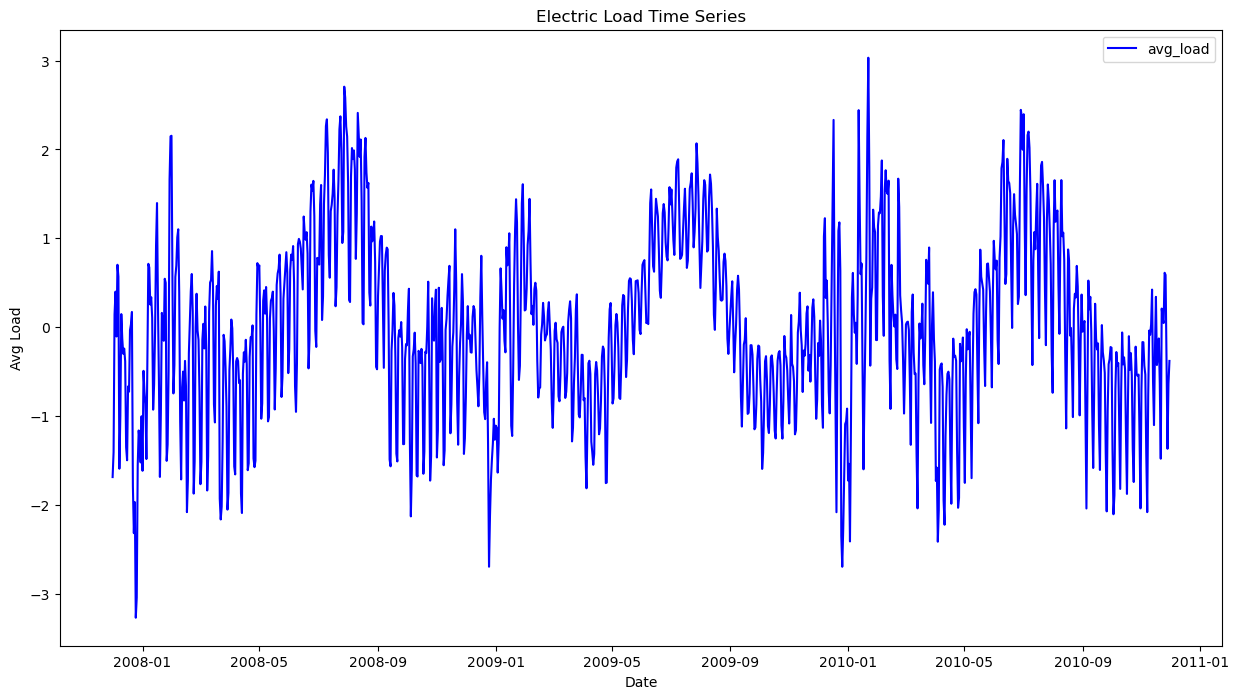

In [83]:
import pandas as pd
import numpy as np

# 读取原始的CSV文件
df = pd.read_csv('data/STL_N-BEATS/seasonal.csv')

# 将avg_load列转换为numpy数组
avg_load = df['season'].to_numpy()

# 计算avg_load列的均值和标准差
avg_load_mean = np.mean(avg_load)
avg_load_std = np.std(avg_load)

# 将avg_load列标准化为标准正态分布
std_avg_load = (avg_load - avg_load_mean) / avg_load_std

# 将标准化后的avg_load列保存为新的CSV文件
df['std_avg_load'] = std_avg_load
df = df.drop(['season'], axis=1)
df.to_csv('data/STL_N-BEATS/standardized_data.csv', index=False)
import pandas as pd

# 读取原始数据
data = pd.read_csv('data/STL_N-BEATS/standardized_data.csv', parse_dates=['date'], index_col='date')
fig = plt.figure(figsize=(15, 8))
# 绘制时间序列图
plt.plot(data.index, data['std_avg_load'], color='blue', label='avg_load')
# 添加x轴和y轴标签
plt.xlabel('Date')
plt.ylabel('Avg Load')

plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

# 添加标题
plt.title('Electric Load Time Series')
# 添加图例
plt.legend()
# 显示图形
plt.show()

In [ ]:
# import pandas as pd
# from datetime import datetime
# import numpy as np
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_absolute_percentage_error
# from sklearn.preprocessing import PolynomialFeatures
# import matplotlib.pyplot as plt
#
#
# # Load data from CSV file
# df = pd.read_csv('data/STL_N-BEATS/trend.csv')
#
# # Convert date strings to datetime objects
# df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
#
# # Convert datetime objects to timestamps
# df['timestamp'] = df['date'].apply(datetime.timestamp)
#
# # Scale the timestamp values using MinMaxScaler
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df['timestamp'] = scaler.fit_transform(df['timestamp'].values.reshape(-1,1))
#
# # Extract x and y values for regression
# x = df['timestamp'].values.reshape(-1, 1)
# y = df['trend'].values.reshape(-1, 1)
#
# # Create polynomial features
# poly = PolynomialFeatures(degree=10)
# x_poly = poly.fit_transform(x)
#
# # Fit the polynomial regression model
# model = LinearRegression()
# model.fit(x_poly, y)
#
# # Predict trend values using the model
# y_pred = model.predict(x_poly)
#
# # Calculate the mean absolute percentage error
# mape = mean_absolute_percentage_error(y, y_pred)
#
# # Plot the data and the model predictions
# plt.plot(df['date'], y, label='Actual')
# plt.plot(df['date'], y_pred, label='Predicted')
# plt.legend()
# plt.show()
#
# print('MAPE:', mape)
#
# # 生成未来30天的日期序列
# last_date = datetime.strptime(df['date'].iloc[-1], '%Y-%m-%d')
# future_dates = pd.date_range(start=last_date, periods=30, freq='D')
#
# # 将未来30天的日期转换为时间戳序列，并归一化处理
# future_timestamps = np.array([datetime.timestamp(d) for d in future_dates]).reshape(-1, 1)
# future_timestamps_norm = (future_timestamps - df['timestamp'].min()) / (df['timestamp'].max() - df['timestamp'].min())
#
# # 对未来30天的趋势进行预测
# future_trend_norm = model.predict(poly.fit_transform(future_timestamps_norm))
#
# # 对预测值进行反归一化处理，得到原始趋势值
# future_trend = future_trend_norm * (df['trend'].max() - df['trend'].min()) + df['trend'].min()
#
# # 将日期和趋势值存入一个新的DataFrame中，并写入CSV文件中
# future_data = pd.DataFrame({'date': future_dates.strftime('%Y-%m-%d'), 'trend': future_trend.reshape(-1)})
# future_data.to_csv('data/STL_N-BEATS/future_trend.csv', index=False)


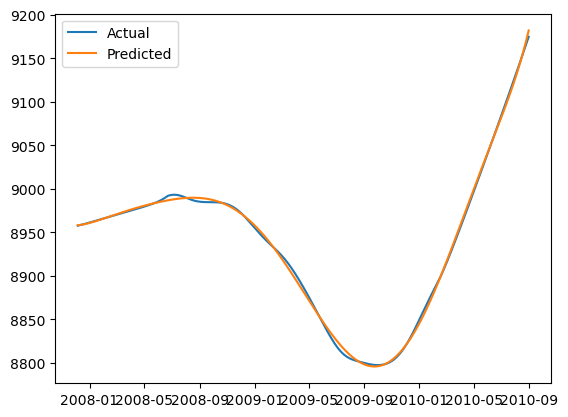

MAPE: 0.00025092194638790764


In [73]:
# import pandas as pd
# from datetime import datetime
# import numpy as np
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_absolute_percentage_error
# from sklearn.preprocessing import PolynomialFeatures
# import matplotlib.pyplot as plt
#
#
# # Load data from CSV file
# df = pd.read_csv('data/STL_N-BEATS/trend.csv')
#
# # Convert date strings to datetime objects
# df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
#
# # Convert datetime objects to timestamps
# df['timestamp'] = df['date'].apply(datetime.timestamp)
#
# # Scale the timestamp values using MinMaxScaler
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df['timestamp'] = scaler.fit_transform(df['timestamp'].values.reshape(-1,1))
#
# # Extract x and y values for regression
# x = df['timestamp'].values.reshape(-1, 1)
# y = df['trend'].values.reshape(-1, 1)
#
# # Create polynomial features
# poly = PolynomialFeatures(degree=8)
# x_poly = poly.fit_transform(x)
#
# # Fit the polynomial regression model
# model = LinearRegression()
# model.fit(x_poly, y)
#
# # Predict trend values using the model
# y_pred = model.predict(x_poly)
#
# # Calculate the mean absolute percentage error
# mape = mean_absolute_percentage_error(y, y_pred)
#
# # Plot the data and the model predictions
# plt.plot(df['date'], y, label='Actual')
# plt.plot(df['date'], y_pred, label='Predicted')
# plt.legend()
# plt.show()
#
# print('MAPE:', mape)
#
# # 生成未来30天的日期序列
# last_date_str = df['date'].iloc[-1].strftime('%Y-%m-%d')
# last_date = datetime.strptime(last_date_str, '%Y-%m-%d')
# start_date = last_date + pd.DateOffset(days=1)
# future_dates = pd.date_range(start=start_date, periods=30, freq='D')
#
# # 将未来30天的日期转换为时间戳序列，并归一化处理
# future_timestamps = np.array([datetime.timestamp(d) for d in future_dates]).reshape(-1, 1)
# # future_timestamps_norm = (future_timestamps - df['timestamp'].min()) / (df['timestamp'].max() - df['timestamp'].min())
#
# # 对未来30天的趋势进行预测
# # np.set_printoptions(precision=6, suppress=True)
# # future_trend_norm = model.predict(poly.fit_transform(future_timestamps_norm))
# future_trend= model.predict(poly.fit_transform(future_timestamps))
#
# # 对预测值进行反归一化处理，得到原始趋势值
# # future_trend = future_trend_norm * (df['trend'].max() - df['trend'].min()) + df['trend'].min()
#
# # 将日期和趋势值存入一个新的DataFrame中，并写入CSV文件中
# future_data = pd.DataFrame({'date': future_dates.strftime('%Y-%m-%d'), 'trend': future_trend.reshape(-1)})
# # pd.options.display.float_format = '{:.2f}'.format # 保留2位小数
# future_data.to_csv('data/STL_N-BEATS/future_trend.csv', index=False)

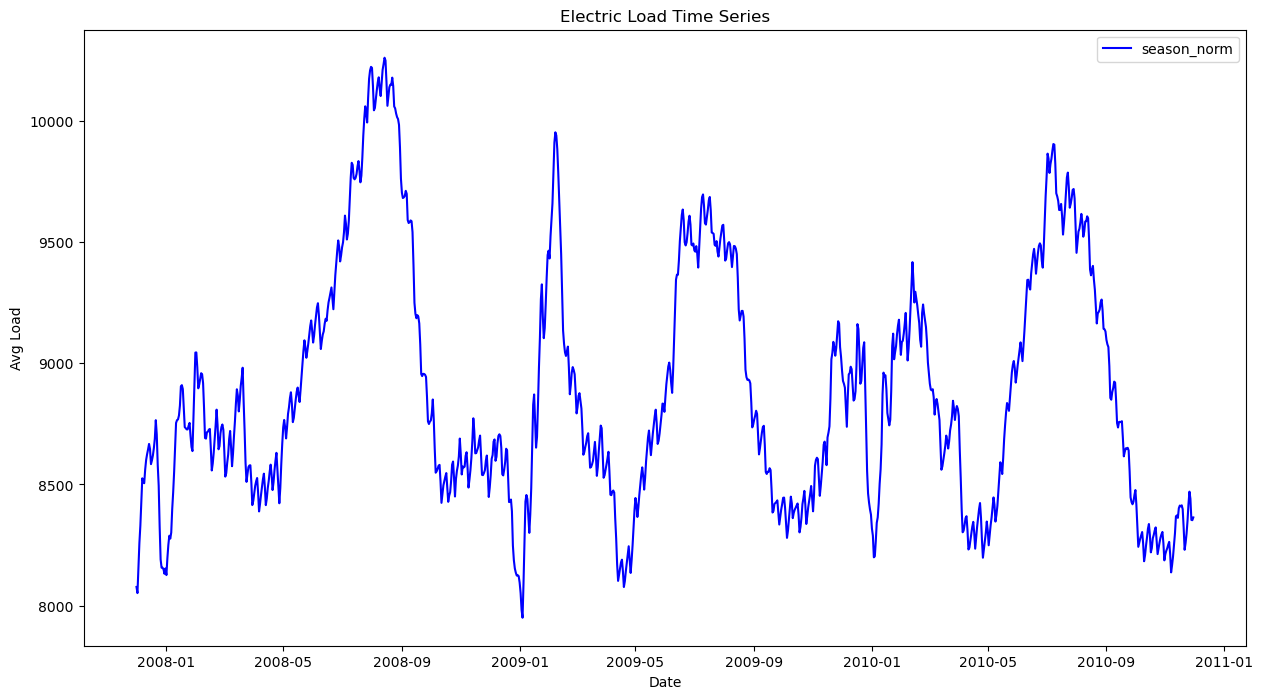

In [12]:
# 因为原来electric曲线太过震荡所以就再进行平滑化
df = pd.read_csv('data/output_avg - 3years.csv',index_col=0, parse_dates=True)
# 计算指数加权移动平均
alpha = 0.1
ema = df['avg_load'].ewm(alpha=alpha, adjust=False).mean()

# 将平滑后的结果保存到新的csv文件
smoothed_df = pd.DataFrame({'smoothed_season': ema})
smoothed_df.to_csv('data/STL_N-BEATS/smoothed_seasonal.csv')
import pandas as pd

# 读取原始数据
data = pd.read_csv('data/STL_N-BEATS/smoothed_seasonal.csv', parse_dates=['date'], index_col='date')
fig = plt.figure(figsize=(15, 8))
# 绘制时间序列图
plt.plot(data.index, data['smoothed_season'], color='blue', label='season_norm')
# 添加x轴和y轴标签
plt.xlabel('Date')
plt.ylabel('Avg Load')

plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

# 添加标题
plt.title('Electric Load Time Series')
# 添加图例
plt.legend()
# 显示图形
plt.show()

            smoothed_season
date                       
2007-12-01      8076.965833
2007-12-02      8051.553875
2007-12-03      8150.650716
2007-12-04      8257.935166
2007-12-05      8329.689357
684
| N-Beats
| --  Stack Trend (#0) (share_weights_in_stack=True)
     | -- TrendBlock(units=128, thetas_dim=4, backcast_length=210, forecast_length=30, share_thetas=True) at @2200224294792
     | -- TrendBlock(units=128, thetas_dim=4, backcast_length=210, forecast_length=30, share_thetas=True) at @2200224294792
     | -- TrendBlock(units=128, thetas_dim=4, backcast_length=210, forecast_length=30, share_thetas=True) at @2200224294792
| --  Stack Seasonality (#1) (share_weights_in_stack=True)
     | -- SeasonalityBlock(units=128, thetas_dim=30, backcast_length=210, forecast_length=30, share_thetas=True) at @2200571996488
     | -- SeasonalityBlock(units=128, thetas_dim=30, backcast_length=210, forecast_length=30, share_thetas=True) at @2200571996488
     | -- SeasonalityBlock(units=128, thetas

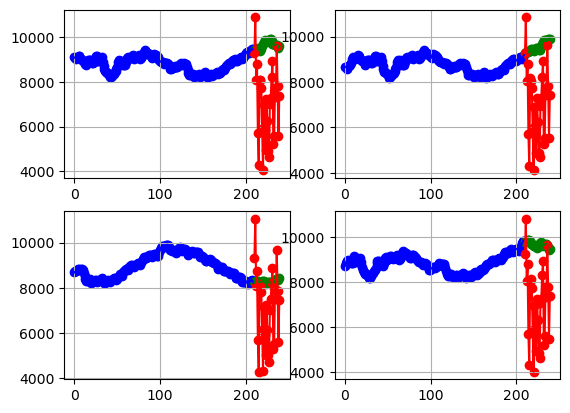

epoch = 0000, grad_step = 000022, tr_loss (epoch) = 283.039, te_loss (epoch) = 67.189


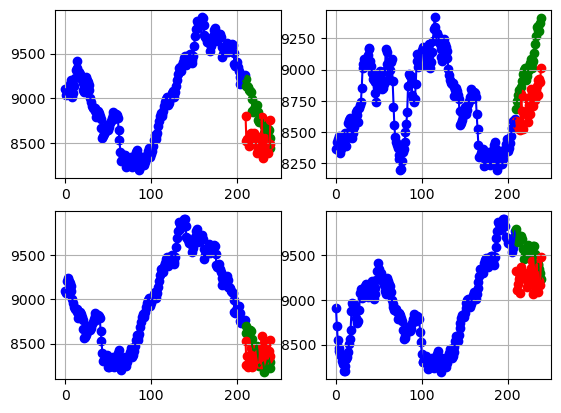

epoch = 0100, grad_step = 002222, tr_loss (epoch) = 0.837, te_loss (epoch) = 1.614


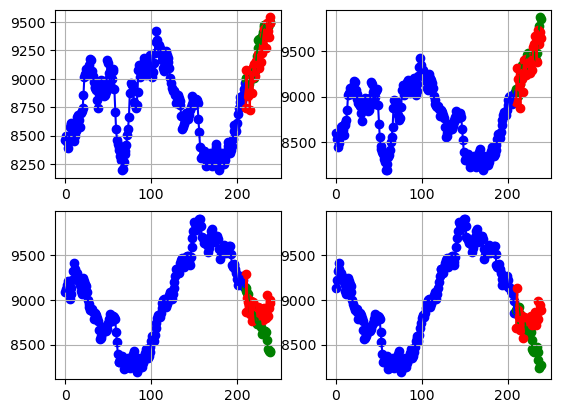

epoch = 0200, grad_step = 004422, tr_loss (epoch) = 0.311, te_loss (epoch) = 0.550


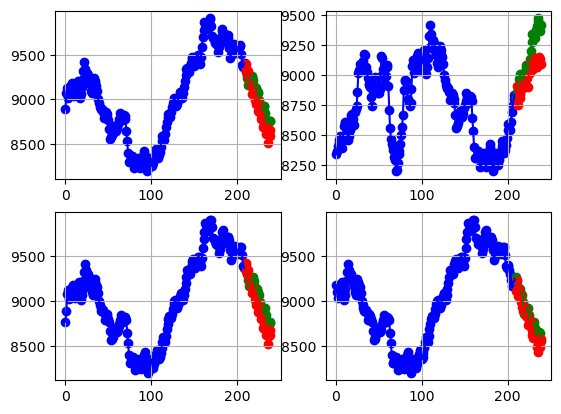

epoch = 0300, grad_step = 006622, tr_loss (epoch) = 0.223, te_loss (epoch) = 0.294


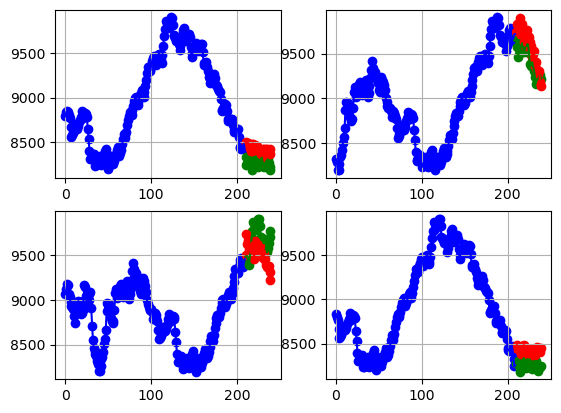

epoch = 0400, grad_step = 008822, tr_loss (epoch) = 0.132, te_loss (epoch) = 0.312


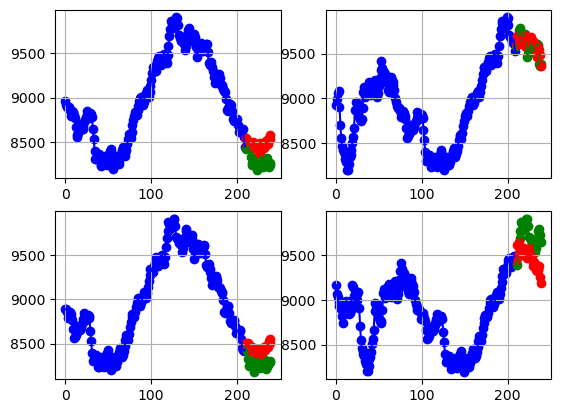

epoch = 0500, grad_step = 011022, tr_loss (epoch) = 0.100, te_loss (epoch) = 0.351


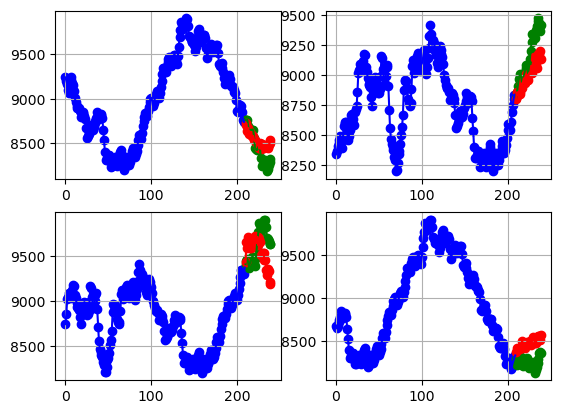

epoch = 0600, grad_step = 013222, tr_loss (epoch) = 0.078, te_loss (epoch) = 0.370


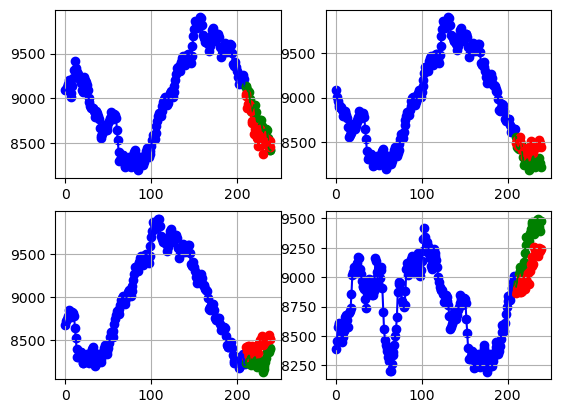

epoch = 0700, grad_step = 015422, tr_loss (epoch) = 0.135, te_loss (epoch) = 0.400


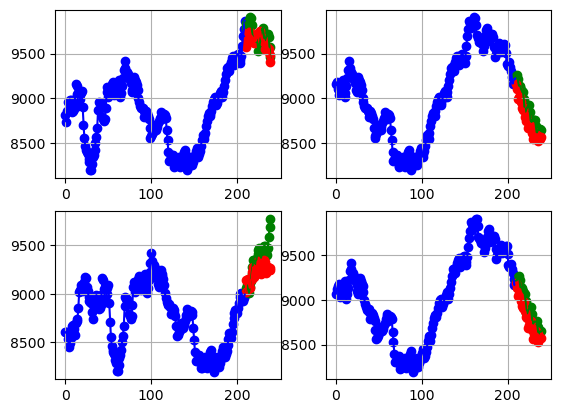

epoch = 0800, grad_step = 017622, tr_loss (epoch) = 0.060, te_loss (epoch) = 0.332


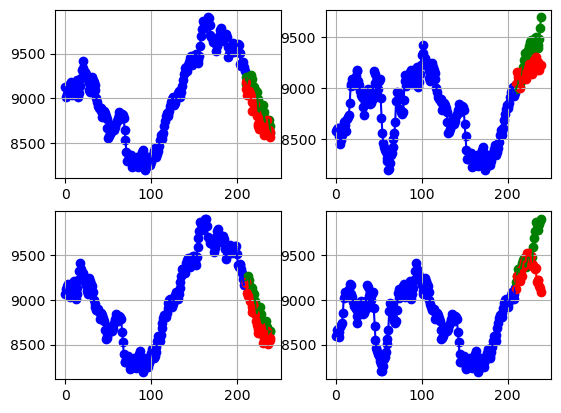

epoch = 0900, grad_step = 019822, tr_loss (epoch) = 0.055, te_loss (epoch) = 0.346
Text [8327.7861328125, 8380.2783203125, 8395.4033203125, 8411.359375, 8496.408203125, 8505.9970703125, 8516.1005859375, 8498.83203125, 8549.349609375, 8535.5361328125, 8521.2080078125, 8562.5966796875, 8561.0302734375, 8578.9853515625, 8570.29296875, 8615.2080078125, 8613.94921875, 8635.1123046875, 8670.6162109375, 8650.9912109375, 8663.3681640625, 8635.01953125, 8586.416015625, 8645.5947265625, 8681.4384765625, 8703.1318359375, 8734.5283203125, 8709.4189453125, 8689.9345703125, 8660.666015625]
TRU [8212.30256981 8226.40170863 8236.82547527 8251.56390694 8263.04570375
 8213.24525837 8137.12060754 8167.03323428 8203.29545255 8249.4792615
 8298.60958535 8368.63000181 8372.26866833 8362.0958223  8402.13917757
 8412.82721811 8409.5686005  8413.96344875 8397.98131218 8321.53124346
 8230.39888991 8258.61710512 8297.16104041 8349.57958217 8419.57560315
 8470.35764704 8441.06156983 8353.63893365 8352.58147778 83

In [14]:

def main():
    forecast_length = 30
    backcast_length = 7 * forecast_length
    batch_size = 32  # greater than 4 for viz

    electric = pd.read_csv('data/STL_N-BEATS/smoothed_seasonal.csv', index_col=0, parse_dates=True)
    # electricO = pd.read_csv('data/STL_N-BEATS/seasonal_normalized.csv', index_col=0, parse_dates=True)

    # electricO= pd.read_csv('data/STL_N-BEATS/seasonal.csv', index_col=0, parse_dates=True)
    print(electric.head())
    # print(electricO.head())
    electric = electric.values.flatten()  # just keep np array here for simplicity.
    # electricO = electricO.values.flatten()

    # data backcast/forecast generation.
    x, y = [], []
    for epoch in range(backcast_length, len(electric) - forecast_length):

        x.append(electric[epoch - backcast_length:epoch])
        y.append(electric[epoch:epoch + forecast_length])
    x = np.array(x)
    y = np.array(y)

    # split train/test.
    c = int(len(x) * 0.8)
    print(c)

    x_train, y_train = x[:c], y[:c]
    x_test, y_test = x[c:], y[c:]

    # normalization.  归一化
    norm_constant = np.max(x_train)
    x_train, y_train = x_train / norm_constant, y_train / norm_constant
    x_test, y_test = x_test / norm_constant, y_test / norm_constant

    # model
    net = NBeatsNet(
        stack_types=( NBeatsNet.TREND_BLOCK,NBeatsNet.SEASONALITY_BLOCK),
        forecast_length=forecast_length,
        backcast_length=backcast_length,
        hidden_layer_units=128,
        share_weights_in_stack=True
    )

    optimiser = optim.Adam(lr=1e-4, params=net.parameters())

    grad_step = 0
    for epoch in range(1000):
        # train.
        net.train()
        train_loss = []
        for x_train_batch, y_train_batch in data_generator(x_train, y_train, batch_size):
            grad_step += 1
            optimiser.zero_grad()
            _, forecast = net(torch.tensor(x_train_batch, dtype=torch.float).to(net.device))
            loss = F.mse_loss(forecast, torch.tensor(y_train_batch, dtype=torch.float).to(net.device))
            train_loss.append(loss.item())
            loss.backward()
            optimiser.step()
        train_loss = np.mean(train_loss)

        # test.
        net.eval()
        _, forecast = net(torch.tensor(x_test, dtype=torch.float))
        test_loss = F.mse_loss(forecast, torch.tensor(y_test, dtype=torch.float)).item()
        p = forecast.detach().numpy()
        if epoch % 100 == 0:
            subplots = [221, 222, 223, 224]
            plt.figure(1)
            for plot_id, i in enumerate(np.random.choice(range(len(x_test)), size=4, replace=False)):
                ff, xx, yy = p[i] * norm_constant, x_test[i] * norm_constant, y_test[i] * norm_constant
                plt.subplot(subplots[plot_id])
                plt.grid()
                plot_scatter(range(0, backcast_length), xx, color='b')
                plot_scatter(range(backcast_length, backcast_length + forecast_length), yy, color='g')
                plot_scatter(range(backcast_length, backcast_length + forecast_length), ff, color='r')
            plt.show()

            with torch.no_grad():
                save(net, optimiser, grad_step)
            print(f'epoch = {str(epoch).zfill(4)}, '
                  f'grad_step = {str(grad_step).zfill(6)}, '
                  f'tr_loss (epoch) = {1000 * train_loss:.3f}, '
                  f'te_loss (epoch) = {1000 * test_loss:.3f}')

    B = forecast.flatten()
    C= B * norm_constant

    NC = C.detach().numpy()


    NNC = NC.tolist()
    # NNC = NC.reshape(-1, 1)
    # NNC = scaler.inverse_transform(NNC)
    # NNC = NNC.ravel()
    # print('type(NNC)',type(NNC))


    Text=NNC[len(NNC)-30::]
    print('Text',Text)




    # electric = electric.tolist()
    TRU = electric[len(electric)-30::]
    print('TRU',TRU)
    print('TRU',len(TRU))
    print(type(TRU),type(TRU))



    # MAPE

    APE=[]
    for day in range(len(TRU)):
        per_err = (TRU[day] - Text[day]) / TRU[day]
        per_err = abs(per_err)
        APE.append(per_err)
        MAPE = sum(APE)/len(APE)
    print(len(TRU),'天总共预测电量的mape的平均值')
    print('mape :',round(MAPE, 2))
    print('mape % :',round(MAPE*100, 2),'%')
    print('---------------------------------------------')
    EVE=[]
    for day in range(len(TRU)):
        per_err1 = abs((TRU[day] - Text[day]) / TRU[day])
        EVE.append(per_err1*100)
    print(EVE)

    torch.save(net,'STL_N-BEATS().pth')


if __name__ == '__main__':
    main()